 # Experiment 1: Binary classification

Content

1. Introduction
2. Used libraries
3. Reading Data from a CSV File
4. Case of study and data understanding
5. Exploratory Data Analysis (EDA)
6. Data cleaning

    6.1 Outliers
    
    6.2 Variants of the same values
    
    6.3 Cleaning data using encoder
    
    6.4 Cleaning data using one hot encoder
    
    6.5 Saving the dataset
    
7. Split the data
8. Data Scaling
    
    8.1 Data Standardisation
    
    8.2 Data Normalisation
    
    
9. Save the data for future work
10. Assess Baseline Model
11. Training a model
    
    11.1 Logistic Regression Classifier
    
    11.2 Logistic Regression Classifier with elasticnet
    
    11.3 Logistic Regression Classifier with L1 Regularisation and saga
    
    11.4 Logistic Regression Classifier with L1 Regularisation and liblinear
    
    11.5 Logistic Regression Classifier with L2 Regularisation and saga
    
    11.6 Logistic Regression Classifier with L2 Regularisation and newton-cg
    
    11.7 Logistic Regression Classifier with L2 Regularisation and newton-cg using normalised data
    
    11.8 Logistic Regression Classifier with L2 Regularisation and liblinear
    
    
12. Conclusion
13. References

## 1. Introduction

In the following study, we will fit a binary classification model using logistic regression to predict if an existing customer is more likely to buy a new car as accurate as possible.

## 2. Used libraries 

In [1]:
#working with data
import pandas as pd
import numpy as np


#plotting data
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 3. Reading Data from a CSV File

In [3]:
df = pd.read_csv('repurchase_training.csv')

In [4]:
df

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,154134,1,NaN,NaN,model_3,Large/SUV,7,10,10,9,10,10,10,3,6,10,10
131333,154135,1,NaN,NaN,model_3,Large/SUV,4,10,10,10,10,10,10,2,3,10,10
131334,154137,1,NaN,NaN,model_5,Large/SUV,4,4,9,5,4,3,8,4,7,10,10
131335,154138,1,NaN,NaN,model_5,Large/SUV,2,1,10,1,10,9,8,3,6,7,10


## 4. Case of study and data understanding 

**[4.1]** Hypothesis

The case study has the following hypothesis:
Analysing the 15 features given to predict if an existing customer is more likely to buy a new car, only car-related variables are enough to explain the repurchase decision.

**[4.2]** Explore the dataset

In [5]:
df.head(5)

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


**[4.3]** Duplicate rows validation

In [6]:
df2 = df.pivot_table(index = ['ID'], aggfunc ='size')
df2[df2>1]

Series([], dtype: int64)

In [7]:
#duplicated rows in the dataframe
dup = df.duplicated()
df[dup]

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased


There are no duplicate records

Let's explore the duplicates without ID

In [8]:
df_copy = df.copy()
df_copy = df_copy.drop(['ID'], axis=1)
df_copy

,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,1,NaN,NaN,model_3,Large/SUV,7,10,10,9,10,10,10,3,6,10,10
131333,1,NaN,NaN,model_3,Large/SUV,4,10,10,10,10,10,10,2,3,10,10
131334,1,NaN,NaN,model_5,Large/SUV,4,4,9,5,4,3,8,4,7,10,10
131335,1,NaN,NaN,model_5,Large/SUV,2,1,10,1,10,9,8,3,6,7,10


In [9]:
#duplicated rows in the dataframe
dup = df_copy.duplicated()
df_copy[dup]

,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
426,0,NaN,NaN,model_2,Small/Medium,4,1,1,2,3,1,1,2,1,1,1
1613,0,NaN,NaN,model_2,Small/Medium,1,1,1,2,2,1,1,1,1,1,1
2154,0,NaN,NaN,model_2,Small/Medium,4,1,1,2,3,1,1,1,1,1,1
3254,0,NaN,NaN,model_2,Small/Medium,3,1,1,2,2,1,1,1,1,1,1
3434,0,NaN,NaN,model_3,Large/SUV,3,1,1,2,2,2,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127689,0,NaN,NaN,model_2,Small/Medium,2,2,1,1,2,2,2,2,2,2,2
127690,0,NaN,NaN,model_4,Small/Medium,3,1,1,1,1,2,1,1,1,1,1
127698,0,2. 25 to 34,Female,model_6,Small/Medium,6,1,1,1,1,1,1,1,1,1,1
127749,0,NaN,NaN,model_2,Small/Medium,3,1,1,1,2,1,1,2,1,1,1


Duplicate records are detected if the customer's unique identifier is not considered.
Since it may be possible to have clients with the same characteristics (apparently duplicates), the decision is to leave these records since we do not have sufficient evidence of whether or not they are real duplicate records. However, the client's ID on this list should be reviewed with the stakeholders or product owner to determine the quality of the information provided.

"Consider a scenario in which there are just two distinct objects. Your original data contains 99 of object A and 1 of object B. After throwing out duplicates, you have 1 object A and 1 object B. A classifier trained on the de-duplicated data will be substantially different than one trained on the original data" (Dodier, 2014).

**[4.4]** General information about the DataFrame 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

It shows the features and its data type,and Null count.
There are missing values in age_band and gender columns. These columns might not be a good option to train the model, because we can miss data dropping rows with no value related on these columns.


## 5. Exploratory Data Analysis (EDA)

Based on: (AGRAWAL, 2019) and (Hoffman, 2020)

In [11]:
sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='Target', ylabel='count'>

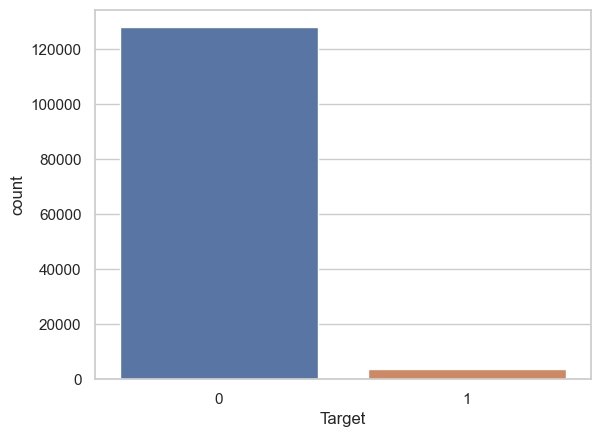

In [12]:
sns.countplot(data = df, x = 'Target')

The dataset is unbalanced where the most significant number of records belong to the target: only one purchase

<AxesSubplot:xlabel='count', ylabel='age_band'>

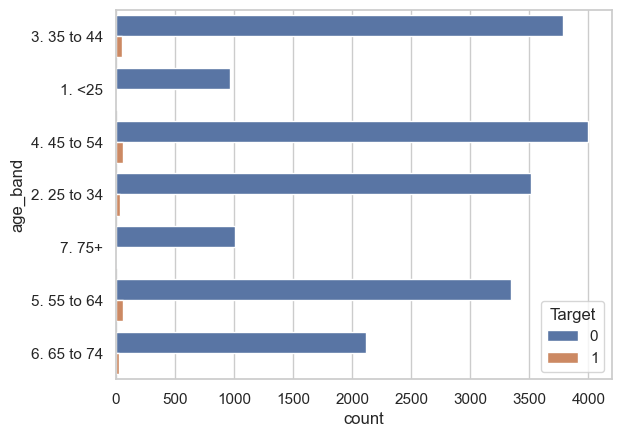

In [13]:
sns.countplot(data = df, y = 'age_band', hue="Target")

<AxesSubplot:xlabel='gender', ylabel='count'>

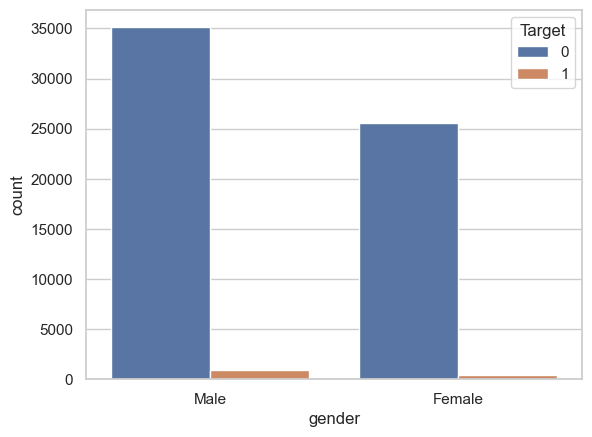

In [14]:
sns.countplot(data = df, x = 'gender', hue="Target")

In [15]:
counts_df = df.groupby(["gender", "Target"])["ID"].count().unstack()
counts_df

Target,0,1
gender,,
Female,25570,387
Male,35115,957


Text(0.5, 0.98, 'Gender vs. Repurchase')

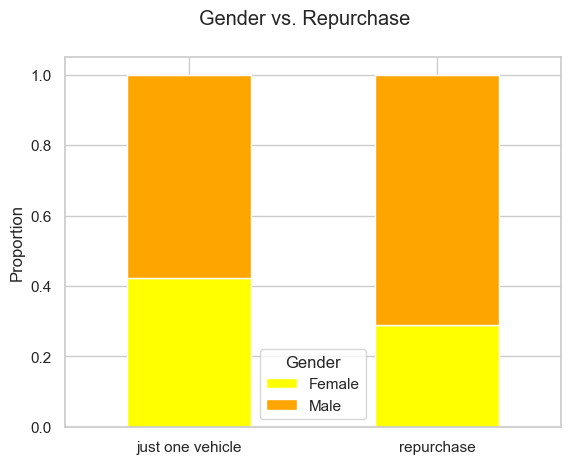

In [16]:
# Divide by the total number and transpose for plotting
pclass_percents_df = counts_df.div(counts_df.sum()).T
fig, ax = plt.subplots()

pclass_percents_df.plot(kind="bar", stacked=True, color=["yellow", "orange"], ax=ax)

ax.legend(title="Gender")
ax.set_xticklabels(["just one vehicle", "repurchase"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle("Gender vs. Repurchase")

Men have repurchased in a higher proportion than women

<AxesSubplot:xlabel='count', ylabel='car_model'>

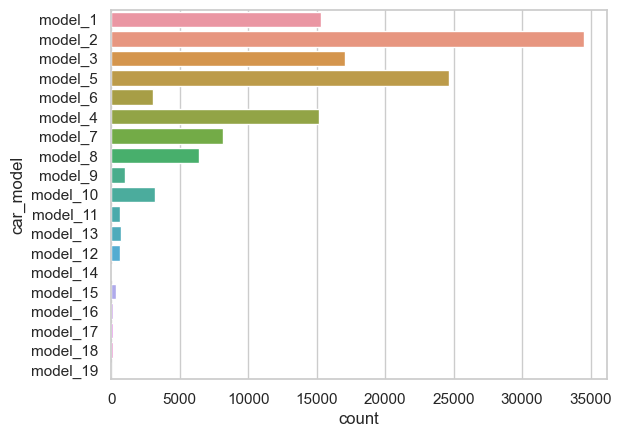

In [17]:
sns.countplot(data = df, y = 'car_model')

Model 2 and model 5 have the highest representation in the data sample.

<AxesSubplot:xlabel='car_segment', ylabel='count'>

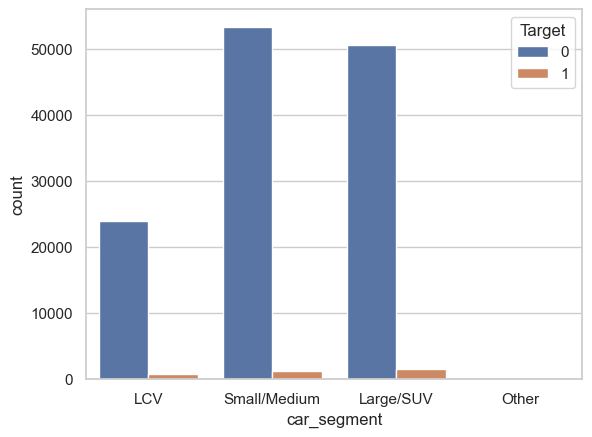

In [18]:
sns.countplot(data = df, x = 'car_segment', hue="Target")

In [19]:
counts_df = df.groupby(["car_segment", "Target"])["ID"].count().unstack()
counts_df

Target,0,1
car_segment,,
LCV,23861,745
Large/SUV,50569,1551
Other,57,1
Small/Medium,53329,1224


In [20]:
# Divide by the total number and transpose for plotting
pclass_percents_df = counts_df.div(counts_df.sum()).T
pclass_percents_df

car_segment,LCV,Large/SUV,Other,Small/Medium
Target,,,,
0,0.186682,0.395639,0.000446,0.417233
1,0.211588,0.440500,0.000284,0.347629


Text(0.5, 0.98, 'car segment vs. Repurchase')

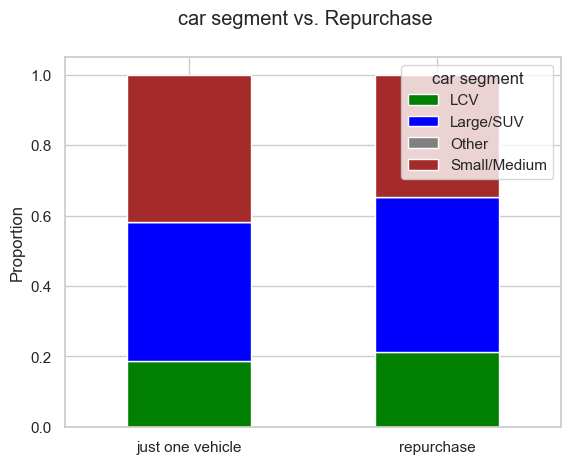

In [21]:
fig, ax = plt.subplots()

pclass_percents_df.plot(kind="bar", stacked=True, color=["green", "blue", "grey", "brown"], ax=ax)

ax.legend(title="car segment")
ax.set_xticklabels(["just one vehicle", "repurchase"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle("car segment vs. Repurchase")

Large/SUV has a higher buyback percentage. While the rate of the total repurchase for Small/Medium decreases compared to the first-time purchase.

<AxesSubplot:xlabel='count', ylabel='mth_since_last_serv'>

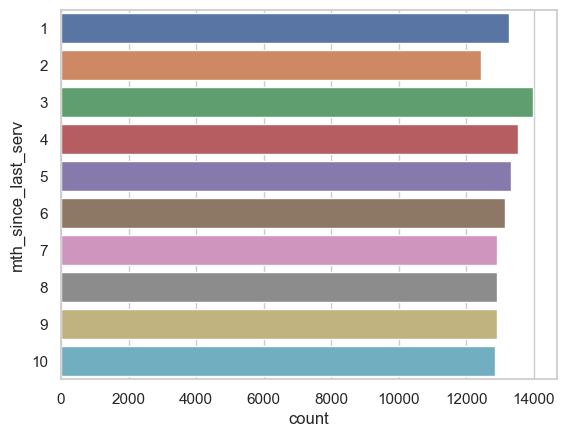

In [22]:
sns.countplot(data = df, y = 'mth_since_last_serv') 

The number of months since the last service presents more records for decile 3 and a lower number for decile 2.

There is no pattern to highlight in the other variables

## 6. Data cleaning

**[6.1]** Outliers

After analysing the variables' values, they are all categorical variables. However, there are no values out of the range of the variables.

In [25]:
df['Target'].unique()

array([0, 1], dtype=int64)

In [26]:
df['age_band'].unique()

array(['3. 35 to 44', nan, '1. <25', '4. 45 to 54', '2. 25 to 34',
       '7. 75+', '5. 55 to 64', '6. 65 to 74'], dtype=object)

In [27]:
df['gender'].unique()

array(['Male', nan, 'Female'], dtype=object)

In [28]:
df['car_model'].unique()

array(['model_1', 'model_2', 'model_3', 'model_5', 'model_6', 'model_4',
       'model_7', 'model_8', 'model_9', 'model_10', 'model_11',
       'model_13', 'model_12', 'model_14', 'model_15', 'model_16',
       'model_17', 'model_18', 'model_19'], dtype=object)

In [29]:
df['car_segment'].unique()

array(['LCV', 'Small/Medium', 'Large/SUV', 'Other'], dtype=object)

In [30]:
df['age_of_vehicle_years'].unique()

array([ 9,  6,  5,  8,  7,  1,  3,  4, 10,  2], dtype=int64)

In [31]:
df['sched_serv_warr'].unique()

array([ 2, 10,  8,  9,  4,  1,  3,  7,  5,  6], dtype=int64)

**[6.2]** Variants of the same values

All categories have one variant of the same values. There is no need to perform any transformation.

**[6.3]** Cleaning data using encoder

In [55]:
df_cleaned1 = df.copy()

In [56]:
df_cleaned1["age_band"] = df_cleaned1["age_band"].fillna(0)

In [57]:
df_cleaned1["gender"] = df_cleaned1["gender"].fillna('A.Other')

In [58]:
df_cleaned1

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,0,A.Other,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,0,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,0,A.Other,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,0,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,154134,1,0,A.Other,model_3,Large/SUV,7,10,10,9,10,10,10,3,6,10,10
131333,154135,1,0,A.Other,model_3,Large/SUV,4,10,10,10,10,10,10,2,3,10,10
131334,154137,1,0,A.Other,model_5,Large/SUV,4,4,9,5,4,3,8,4,7,10,10
131335,154138,1,0,A.Other,model_5,Large/SUV,2,1,10,1,10,9,8,3,6,7,10


In [59]:
#encode the age_band with the first string
df_cleaned1['age_band'] = df_cleaned1['age_band'].astype(str).str[0]
df_cleaned1['age_band'].unique()

array(['3', '0', '1', '4', '2', '7', '5', '6'], dtype=object)

In [60]:
#encode the car_model with the last string
df_cleaned1['car_model'] = df_cleaned1['car_model'].astype(str).str[-1]
df_cleaned1['car_model'].unique()

array(['1', '2', '3', '5', '6', '4', '7', '8', '9', '0'], dtype=object)

In [61]:
df_cleaned1

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3,Male,1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,0,A.Other,2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,0,Male,3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,0,A.Other,3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,0,Female,2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,154134,1,0,A.Other,3,Large/SUV,7,10,10,9,10,10,10,3,6,10,10
131333,154135,1,0,A.Other,3,Large/SUV,4,10,10,10,10,10,10,2,3,10,10
131334,154137,1,0,A.Other,5,Large/SUV,4,4,9,5,4,3,8,4,7,10,10
131335,154138,1,0,A.Other,5,Large/SUV,2,1,10,1,10,9,8,3,6,7,10


In [62]:
#one hot encoding for gender feature
df_cat = pd.get_dummies(df_cleaned1["gender"], drop_first=True)
df_cat

,Female,Male
0,0,1
1,0,0
2,0,1
3,0,0
4,1,0
...,...,...
131332,0,0
131333,0,0
131334,0,0
131335,0,0


In [63]:
#join the one hot encoding in the clean dataset
df_cleaned1 = pd.concat([df_cleaned1, df_cat], axis=1)
df_cleaned1

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,Female,Male
0,1,0,3,Male,1,LCV,9,2,10,3,7,5,6,9,8,10,4,0,1
1,2,0,0,A.Other,2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10,0,0
2,3,0,0,Male,3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10,0,1
3,5,0,0,A.Other,3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7,0,0
4,6,0,0,Female,2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,154134,1,0,A.Other,3,Large/SUV,7,10,10,9,10,10,10,3,6,10,10,0,0
131333,154135,1,0,A.Other,3,Large/SUV,4,10,10,10,10,10,10,2,3,10,10,0,0
131334,154137,1,0,A.Other,5,Large/SUV,4,4,9,5,4,3,8,4,7,10,10,0,0
131335,154138,1,0,A.Other,5,Large/SUV,2,1,10,1,10,9,8,3,6,7,10,0,0


In [64]:
#dropping source column of gender
df_cleaned1 = df_cleaned1.drop(['gender'], axis=1)


In [65]:
#encoding car_segment with pre-defined order
df_cleaned1['car_segment'] = df_cleaned1['car_segment'].replace('Small/Medium', 1)
df_cleaned1['car_segment'] = df_cleaned1['car_segment'].replace('Large/SUV', 2)
df_cleaned1['car_segment'] = df_cleaned1['car_segment'].replace('LCV', 3)
df_cleaned1['car_segment'] = df_cleaned1['car_segment'].replace('Other', 0)

In [66]:
#drop ID column that is not useful for the modeling process
df_cleaned1 = df_cleaned1.drop(['ID'], axis=1)

In [67]:
#display dataset
df_cleaned1

,Target,age_band,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,Female,Male
0,0,3,1,3,9,2,10,3,7,5,6,9,8,10,4,0,1
1,0,0,2,1,6,10,3,10,4,9,10,6,10,7,10,0,0
2,0,0,3,2,9,10,9,10,9,10,10,7,10,6,10,0,1
3,0,0,3,2,5,8,5,8,4,5,6,4,10,9,7,0,0
4,0,0,2,1,8,9,4,10,7,9,8,5,4,4,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,1,0,3,2,7,10,10,9,10,10,10,3,6,10,10,0,0
131333,1,0,3,2,4,10,10,10,10,10,10,2,3,10,10,0,0
131334,1,0,5,2,4,4,9,5,4,3,8,4,7,10,10,0,0
131335,1,0,5,2,2,1,10,1,10,9,8,3,6,7,10,0,0


**[6.4]** Cleaning data using one hot encoder

Deleting rows with missing values is not a good approach because the amount of data we will lose represents a high proportion of the data.

Since we don't have extra information to confirm if we encounter errors in the data, and considering that we don't have any clue to fill missing values.

The decision is to fill values with 0 and create a new category for each column: age_band and gender.


In [68]:
df_cleaned2 = df.copy()

In [69]:
missing_values = df.isnull().sum(min_count=1)
missing_values = missing_values[missing_values != 0]
missing_values

age_band    112375
gender       69308
dtype: int64

In [70]:
#fill age_band missing values with 0
df_cleaned2["age_band"] = df_cleaned2["age_band"].fillna(0)

In [71]:
#encode the age_band with the first string
df_cleaned2['age_band'] = df_cleaned2['age_band'].astype(str).str[0]
df_cleaned2['age_band'].unique()

array(['3', '0', '1', '4', '2', '7', '5', '6'], dtype=object)

Transforming categorical values - one hot encoding: 

The following process transforms the categorical data using the get_dummies() function.

One hot encoding for gender

In [72]:
#one hot encoding for gender feature
df_cat = pd.get_dummies(df_cleaned2["gender"], drop_first=True)
df_cat

,Male
0,1
1,0
2,1
3,0
4,0
...,...
131332,0
131333,0
131334,0
131335,0


In [73]:
#join the one hot encoding in the clean dataset
df_cleaned2 = pd.concat([df_cleaned2, df_cat], axis=1)

In [74]:
#dropping source column of gender
df_cleaned2 = df_cleaned2.drop(['gender'], axis=1)

Same process for car_segment

In [75]:
#one hot encoding for car_segment feature
df_cat = pd.get_dummies(df_cleaned2["car_segment"])
df_cat

,LCV,Large/SUV,Other,Small/Medium
0,1,0,0,0
1,0,0,0,1
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
131332,0,1,0,0
131333,0,1,0,0
131334,0,1,0,0
131335,0,1,0,0


In [76]:
#Combine the one-hot encoded columns contained in df_cat into df_cleaned2
df_cleaned2 = pd.concat([df_cleaned2, df_cat], axis=1)

In [77]:
#dropping source column
df_cleaned2 = df_cleaned2.drop(['car_segment'], axis=1)

Same process for car_model

In [78]:
df_cat = pd.get_dummies(df_cleaned2["car_model"])
df_cat

,model_1,model_10,model_11,model_12,model_13,model_14,model_15,model_16,model_17,model_18,model_19,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
131333,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
131334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
131335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [79]:
#join the one hot encoding in the clean dataset
df_cleaned2 = pd.concat([df_cleaned2, df_cat], axis=1)

In [80]:
#dropping source column
df_cleaned2 = df_cleaned2.drop(['car_model'], axis=1)

In [81]:
#validate data
df_cleaned2.shape

(131337, 38)

Drop columns with no meaning for the trainig

In [82]:
df_cleaned2 = df_cleaned2.drop(['ID'], axis=1)

In [83]:
df_cleaned2

,Target,age_band,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,...,model_18,model_19,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9
0,0,3,9,2,10,3,7,5,6,9,...,0,0,0,0,0,0,0,0,0,0
1,0,0,6,10,3,10,4,9,10,6,...,0,0,1,0,0,0,0,0,0,0
2,0,0,9,10,9,10,9,10,10,7,...,0,0,0,1,0,0,0,0,0,0
3,0,0,5,8,5,8,4,5,6,4,...,0,0,0,1,0,0,0,0,0,0
4,0,0,8,9,4,10,7,9,8,5,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,1,0,7,10,10,9,10,10,10,3,...,0,0,0,1,0,0,0,0,0,0
131333,1,0,4,10,10,10,10,10,10,2,...,0,0,0,1,0,0,0,0,0,0
131334,1,0,4,4,9,5,4,3,8,4,...,0,0,0,0,0,1,0,0,0,0
131335,1,0,2,1,10,1,10,9,8,3,...,0,0,0,0,0,1,0,0,0,0


**[6.5]** Saving the dataset df_clean

In the following step, we will save the dataset with the cleaning process 2 to use during the Logistic Regression modelling.

In [84]:
df_cleaned = df_cleaned2.copy()

Save the clean data on a CSV file

In [85]:
pd.DataFrame(df_cleaned1).to_csv("df_cleaned1.csv")
pd.DataFrame(df_cleaned2).to_csv("df_cleaned2.csv")

## 7. Split the data 

**[7.1]** Split data and test

Stratify=y will be used to distribute the data for train, valid and test proportionally, preserving the distribution of the two classes (Brownlee, 2020a), (Brownlee, 2020d).

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
df_cleaned.columns

Index(['Target', 'age_band', 'age_of_vehicle_years', 'sched_serv_warr',
       'non_sched_serv_warr', 'sched_serv_paid', 'non_sched_serv_paid',
       'total_paid_services', 'total_services', 'mth_since_last_serv',
       'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased', 'Male', 'LCV', 'Large/SUV', 'Other',
       'Small/Medium', 'model_1', 'model_10', 'model_11', 'model_12',
       'model_13', 'model_14', 'model_15', 'model_16', 'model_17', 'model_18',
       'model_19', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6',
       'model_7', 'model_8', 'model_9'],
      dtype='object')

In [88]:
X = df_cleaned[['age_band', 'age_of_vehicle_years', 'sched_serv_warr',
       'non_sched_serv_warr', 'sched_serv_paid', 'non_sched_serv_paid',
       'total_paid_services', 'total_services', 'mth_since_last_serv',
       'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased', 'Male', 'LCV', 'Large/SUV', 'Other',
       'Small/Medium', 'model_1', 'model_10', 'model_11', 'model_12',
       'model_13', 'model_14', 'model_15', 'model_16', 'model_17', 'model_18',
       'model_19', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6',
       'model_7', 'model_8', 'model_9']].values
y = df_cleaned['Target'].values

In [89]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**[7.2]** Split train and validation

In [90]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [91]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(84055, 36)
(21014, 36)
(26268, 36)
(84055,)
(21014,)
(26268,)


**[7.3]** Count classes

In [92]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([81803,  2252], dtype=int64))

In [93]:
np.unique(y_val, return_counts=True)

(array([0, 1], dtype=int64), array([20449,   565], dtype=int64))

In [94]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([25564,   704], dtype=int64))

The count per label indicates that we are preserving the class distribution with 2,7% values class 1 over class 0.

## 8.  Data Scaling

We will perform a data scaling to prevent an increased bias in the model in a specific range of values. We will have two scaling approaches: Normalisation and Standardisation. (Arsik36, 2020), (Kapkar, 2020)

**[8.1]** Data Standardisation

"The Standardisation technique is used to center the feature columns at mean 0 with a standard deviation of 1 so that the feature columns have the same parameters as a standard normal distribution. Unlike Normalization, standardization maintains useful information about **outliers** and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales the data to a limited range of values. Here is the formula for standardization." (Kumar, 2020)

"Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well-behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results." (Brownlee, 2020c)

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [97]:
scaled = scaler.transform(X_train)
scaled

array([[ 3.69027246, -0.5248133 , -1.54443936, ..., -0.25852803,
        -0.22682549, -0.08655235],
       [-0.37610327, -0.17332784,  1.2296538 , ..., -0.25852803,
        -0.22682549, -0.08655235],
       [-0.37610327,  1.58409941, -0.15739278, ..., -0.25852803,
        -0.22682549, -0.08655235],
       ...,
       [-0.37610327,  1.58409941,  0.53613051, ..., -0.25852803,
        -0.22682549, -0.08655235],
       [-0.37610327,  0.88112851, -0.85091607, ..., -0.25852803,
        -0.22682549, -0.08655235],
       [-0.37610327, -1.57926965, -1.19767771, ..., -0.25852803,
        -0.22682549, -0.08655235]])

**[8.2]** Data Normalisation

"Normalization refers to the rescaling of the features to a range of [0, 1], which is a special case of min-max scaling. To normalize the data, the min-max scaling can be applied to one or more feature columns" (Kumar, 2020)

With this method, we will lose information from the data, like outliers. However, it is not a problem in the current study.

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
scaler_norm = MinMaxScaler()
scaler_norm.fit(X_train)

MinMaxScaler()

In [100]:
scaled_norm = scaler_norm.transform(X_train)
scaled_norm

array([[0.85714286, 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.44444444, 0.88888889, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.44444444, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.77777778, 0.22222222, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.11111111, ..., 0.        , 0.        ,
        0.        ]])

## 9.  Save the data

**[9.1]** Replace features with scaler

In [101]:
#using StandardScaler
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [102]:
# using MinMaxScaler
X_train_norm = scaler_norm.transform(X_train)
X_val_norm = scaler_norm.transform(X_val)
X_test_norm = scaler_norm.transform(X_test)

**[9.2]** Save the pre-processed data on a CSV file

In [103]:
#features with StandardScaler
pd.DataFrame(X_train).to_csv("X_train.csv")
pd.DataFrame(X_val).to_csv("X_val.csv")
pd.DataFrame(X_test).to_csv("X_test.csv")

In [104]:
#features with MinMaxScaler
pd.DataFrame(X_train_norm).to_csv("X_train_norm.csv")
pd.DataFrame(X_val_norm).to_csv("X_val_norm.csv")
pd.DataFrame(X_test_norm).to_csv("X_test_norm.csv")

In [105]:
#target
pd.DataFrame(y_train).to_csv("y_train.csv")
pd.DataFrame(y_val).to_csv("y_val.csv")
pd.DataFrame(y_test).to_csv("y_test.csv")

## 10. Assess Baseline Model

This study will use F2 score. The reason behind the metric selection is based on the highly imbalanced dataset and the fact that we care more about positive class for the purpose of the prediction (Czakon, 2022) (Malato, 2021) and (Olugbenga, 2022). 

We want the prediction of repurchases to be as correct as possible and avoid false negative predictions (type II error) where the campaigns can lose potential clients. Moreover, we will prevent excessive type I error by predicting false potential clients.

This phenomenon could occur easily in this dataset due to the unbalanced classes in the study. (Brownlee, 2020a)(Brownlee, 2020b)


**[10.1]** base model

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, fbeta_score
from sklearn.metrics import auc, precision_recall_curve

In [107]:
from statistics import mode

In [108]:
y_mode = mode(y_train)
y_mode

0

In [109]:
y_train.shape

(84055,)

In [110]:
y_base = np.full(y_train.shape, y_mode)

In [111]:
y_base

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [112]:
y_base.shape

(84055,)

In [113]:
print(accuracy_score(y_train, y_base))
print(f1_score(y_train, y_base, average='weighted'))
print(precision_score(y_train, y_base))
print(recall_score(y_train, y_base))
print(average_precision_score(y_train, y_base))
print(fbeta_score(y_train, y_base, beta=2, pos_label=1, average='binary'))

0.9732080185592766
0.9599939169916978
0.0
0.0
0.026791981440723336
0.0


**[10.2]** confusion matrix

In [114]:
from sklearn.metrics import confusion_matrix

In [115]:
results = confusion_matrix(y_train, y_base)
print(results)

[[81803     0]
 [ 2252     0]]


**[10.3]** Count classes

In [116]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([81803,  2252], dtype=int64))

## 11. Training a model

Based on: (scikit-learn developers, 2023) and (So, 2023)

We will use features based on StandardScaler, and at the end we will compared models training with features based on MinMaxScaler.

**[11.1]** Logistic Regression Classifier

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, fbeta_score
from sklearn.metrics import auc, precision_recall_curve

In [118]:
log_reg = LogisticRegression(class_weight='balanced')

In [119]:
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [120]:
y_train_preds = log_reg.predict(X_train)

In [121]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

0.7767057283921242
0.8522261535891441
0.09554826387188403
0.8663410301953819
0.08635836999453973
0.3314982838889456


In [122]:
#confusion matrix
results = confusion_matrix(y_train, y_train_preds)
print(results)

[[63335 18468]
 [  301  1951]]


In [125]:
#precision-recall auc curve
probs = log_reg.predict_proba(X_train)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_train, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)

Logistic PR AUC: 0.397


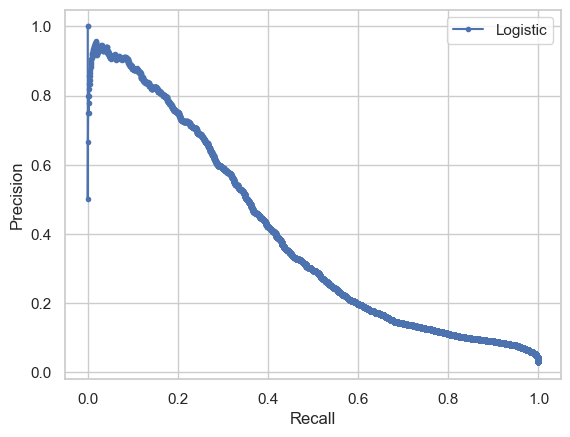

In [126]:
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [127]:
#score for the validation set
y_val_preds = log_reg.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.7809555534405634
0.8549175588618895
0.0962
0.8513274336283185
0.08589503422497095
0.331267217630854


In [128]:
#precision-recall auc curve
probs = log_reg.predict_proba(X_val)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_val, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)

Logistic PR AUC: 0.376


In [129]:
#score for the test set
y_test_preds = log_reg.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.7744023146033197
0.8507171250498018
0.09481688392302917
0.8678977272727273
0.08583178748370542
0.3299136069114471


In [130]:
#precision-recall auc curve
probs = log_reg.predict_proba(X_test)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_test, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)

Logistic PR AUC: 0.401


**[11.2]** Logistic Regression Classifier with elasticnet

note:

* if penalty='elasticnet': both L1 and L2 penalty terms are added
* if penalty='elasticnet', The algorithm to use in the optimization problem (solver) is ‘saga’
* ‘saga’ fast convergence is only guaranteed on features with approximately the same scale   
* l1_ratio: 0 < l1_ratio <1, the penalty is a combination of L1 and L2. Only used if penalty='elasticnet'

(scikit-learn developers, 2023)


In [131]:
log_elastic_reg = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', class_weight='balanced')

log_elastic_reg.fit(X_train, y_train)

y_train_preds_elastic = log_elastic_reg.predict(X_train)

print(accuracy_score(y_train, y_train_preds_elastic))
print(f1_score(y_train, y_train_preds_elastic, average='weighted'))
print(precision_score(y_train, y_train_preds_elastic))
print(recall_score(y_train, y_train_preds_elastic))
print(average_precision_score(y_train, y_train_preds_elastic))
print(fbeta_score(y_train, y_train_preds_elastic, beta=2, pos_label=1, average='binary'))

0.7750639462256855
0.8511556814143918
0.09510380706957748
0.8685612788632326
0.08612498807040304
0.3306846999154691


In [132]:
results = confusion_matrix(y_train, y_train_preds_elastic)
print(results)

[[63192 18611]
 [  296  1956]]


In [133]:
#precision-recall auc curve
probs = log_elastic_reg.predict_proba(X_train)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_train, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)

Logistic PR AUC: 0.398


**[11.3]** Logistic Regression Classifier with L1 Regularisation and saga

note:

* using l1 penalty with saga solver

In [134]:
log_reg_l1_saga = LogisticRegression(penalty='l1', solver='saga', class_weight='balanced')

log_reg_l1_saga.fit(X_train, y_train)

y_train_preds_l1_saga = log_reg_l1_saga.predict(X_train)

print(accuracy_score(y_train, y_train_preds_l1_saga))
print(f1_score(y_train, y_train_preds_l1_saga, average='weighted'))
print(precision_score(y_train, y_train_preds_l1_saga))
print(recall_score(y_train, y_train_preds_l1_saga))
print(average_precision_score(y_train, y_train_preds_l1_saga))
print(fbeta_score(y_train, y_train_preds_l1_saga, beta=2, pos_label=1, average='binary'))

0.7750401522812445
0.8511399365242891
0.09505518549132105
0.8681172291296625
0.08605244499264098
0.33051563820794594


In [135]:
results = confusion_matrix(y_train, y_train_preds_l1_saga)
print(results)

[[63191 18612]
 [  297  1955]]


In [136]:
#precision-recall auc curve
probs = log_reg_l1_saga.predict_proba(X_train)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_train, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)

Logistic PR AUC: 0.398


**[11.4]** Logistic Regression Classifier with L1 Regularisation and liblinear

note:

* For small datasets, ‘liblinear’ is a good choice
* ‘liblinear’ is limited to one-versus-rest schemes

(scikit-learn developers, 2023)

In [137]:
log_reg_l1_lib = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced')

log_reg_l1_lib.fit(X_train, y_train)

y_train_preds_l1_lib = log_reg_l1_lib.predict(X_train)

print(accuracy_score(y_train, y_train_preds_l1_lib))
print(f1_score(y_train, y_train_preds_l1_lib, average='weighted'))
print(precision_score(y_train, y_train_preds_l1_lib))
print(recall_score(y_train, y_train_preds_l1_lib))
print(average_precision_score(y_train, y_train_preds_l1_lib))
print(fbeta_score(y_train, y_train_preds_l1_lib, beta=2, pos_label=1, average='binary'))

0.7766700374754625
0.8522028778063117
0.09553422779355597
0.8663410301953819
0.0863462099639811
0.33146449201495076


In [138]:
results = confusion_matrix(y_train, y_train_preds_l1_lib)
print(results)

[[63332 18471]
 [  301  1951]]


In [139]:
#precision-recall auc curve
probs = log_reg_l1_lib.predict_proba(X_train)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_train, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)

Logistic PR AUC: 0.397


**[11.5]** Logistic Regression Classifier with L2 Regularisation and saga

In [140]:
log_reg_l2_saga = LogisticRegression(penalty='l2', solver='saga', class_weight='balanced')

log_reg_l2_saga.fit(X_train, y_train)

y_train_preds_l2_saga = log_reg_l2_saga.predict(X_train)

print(accuracy_score(y_train, y_train_preds_l2_saga))
print(f1_score(y_train, y_train_preds_l2_saga, average='weighted'))
print(precision_score(y_train, y_train_preds_l2_saga))
print(recall_score(y_train, y_train_preds_l2_saga))
print(average_precision_score(y_train, y_train_preds_l2_saga))
print(fbeta_score(y_train, y_train_preds_l2_saga, beta=2, pos_label=1, average='binary'))

0.7750282553090239
0.8511323671588085
0.09508993680116674
0.8685612788632326
0.08611294089233404
0.3306511596456826


In [141]:
results = confusion_matrix(y_train, y_train_preds_l2_saga)
print(results)

[[63189 18614]
 [  296  1956]]


In [142]:
#precision-recall auc curve
probs = log_reg_l2_saga.predict_proba(X_train)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_train, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)

Logistic PR AUC: 0.398


**[11.6]** Logistic Regression Classifier with L2 Regularisation and newton-cg

note:

* ‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. 
* it is limited to binary classification

(scikit-learn developers, 2023)

In [143]:
log_reg_l2_cg = LogisticRegression(penalty='l2', solver='newton-cg', class_weight='balanced')

log_reg_l2_cg.fit(X_train, y_train)

y_train_preds_l2_cg = log_reg_l2_cg.predict(X_train)

print(accuracy_score(y_train, y_train_preds_l2_cg))
print(f1_score(y_train, y_train_preds_l2_cg, average='weighted'))
print(precision_score(y_train, y_train_preds_l2_cg))
print(recall_score(y_train, y_train_preds_l2_cg))
print(average_precision_score(y_train, y_train_preds_l2_cg))
print(fbeta_score(y_train, y_train_preds_l2_cg, beta=2, pos_label=1, average='binary'))

0.7767176253643447
0.8522339120115162
0.09555294348124205
0.8663410301953819
0.08636242413213187
0.33150954937810106


In [144]:
results = confusion_matrix(y_train, y_train_preds_l2_cg)
print(results)

[[63336 18467]
 [  301  1951]]


In [145]:
#precision-recall auc curve
probs = log_reg_l2_cg.predict_proba(X_train)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_train, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)

Logistic PR AUC: 0.397


In [146]:
#score for the validation set
y_val_preds = log_reg_l2_cg.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.7809555534405634
0.8549175588618895
0.0962
0.8513274336283185
0.08589503422497095
0.331267217630854


In [147]:
#precision-recall auc curve
probs = log_reg_l2_cg.predict_proba(X_val)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_val, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)

Logistic PR AUC: 0.376


In [148]:
#score for the test set
y_test_preds = log_reg_l2_cg.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.7744023146033197
0.8507171250498018
0.09481688392302917
0.8678977272727273
0.08583178748370542
0.3299136069114471


In [149]:
#precision-recall auc curve
probs = log_reg_l2_cg.predict_proba(X_test)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_test, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)

Logistic PR AUC: 0.401


**[11.7]** Logistic Regression Classifier with L2 Regularisation and newton-cg using normalised data

In [150]:
log_reg_l2_cg = LogisticRegression(penalty='l2', solver='newton-cg', class_weight='balanced')

log_reg_l2_cg.fit(X_train_norm, y_train)

y_train_preds_l2_cg = log_reg_l2_cg.predict(X_train_norm)

print(accuracy_score(y_train, y_train_preds_l2_cg))
print(f1_score(y_train, y_train_preds_l2_cg, average='weighted'))
print(precision_score(y_train, y_train_preds_l2_cg))
print(recall_score(y_train, y_train_preds_l2_cg))
print(average_precision_score(y_train, y_train_preds_l2_cg))
print(fbeta_score(y_train, y_train_preds_l2_cg, beta=2, pos_label=1, average='binary'))

0.7758967342811255
0.8516994597986376
0.09542859930721569
0.8685612788632326
0.08640709003169093
0.33146924250127097


In [151]:
results = confusion_matrix(y_train, y_train_preds_l2_cg)
print(results)

[[63262 18541]
 [  296  1956]]


In [152]:
#precision-recall auc curve
probs = log_reg_l2_cg.predict_proba(X_train_norm)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_train, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)

Logistic PR AUC: 0.395


In [153]:
#score for the validation set
y_val_preds = log_reg_l2_cg.predict(X_val_norm)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.7795279337584468
0.853991357008815
0.09578696343402225
0.8530973451327434
0.08566535199108105
0.3304991771804718


In [154]:
#precision-recall auc curve
probs = log_reg_l2_cg.predict_proba(X_val_norm)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_val, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)

Logistic PR AUC: 0.374


In [155]:
#score for the test set
y_test_preds = log_reg_l2_cg.predict(X_test_norm)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.7736028627988427
0.8501955499227944
0.0947596228165095
0.8707386363636364
0.08597515590631337
0.3301023155627356


In [156]:
#precision-recall auc curve
probs = log_reg_l2_cg.predict_proba(X_test_norm)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_test, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)

Logistic PR AUC: 0.400


**[11.8]** Logistic Regression Classifier with L2 Regularisation and liblinear

In [157]:
log_reg_l2_lib = LogisticRegression(penalty='l2', solver='liblinear', class_weight='balanced')

log_reg_l2_lib.fit(X_train, y_train)

y_train_preds_l2_lib = log_reg_l2_lib.predict(X_train)

print(accuracy_score(y_train, y_train_preds_l2_lib))
print(f1_score(y_train, y_train_preds_l2_lib, average='weighted'))
print(precision_score(y_train, y_train_preds_l2_lib))
print(recall_score(y_train, y_train_preds_l2_lib))
print(average_precision_score(y_train, y_train_preds_l2_lib))
print(fbeta_score(y_train, y_train_preds_l2_lib, beta=2, pos_label=1, average='binary'))

0.7766700374754625
0.8522028778063117
0.09553422779355597
0.8663410301953819
0.0863462099639811
0.33146449201495076


In [158]:
results = confusion_matrix(y_train, y_train_preds_l2_lib)
print(results)

[[63332 18471]
 [  301  1951]]


In [159]:
#precision-recall auc curve
probs = log_reg_l2_lib.predict_proba(X_train)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_train, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)

Logistic PR AUC: 0.397


## 12. Conclusion

All models had similar behaviour. The model with the default parameters is chosen [11.1] Logistic Regression Classifier. It improved the prediction compared to the base model. However, the model's performance is still low.
The decision is to try other algorithms to validate whether the data fits better using another learning method.


## 13. References

AGRAWAL, S. (2019). EDA for Categorical Variables—A Beginner’s Way. https://kaggle.com/code/nextbigwhat/eda-for-categorical-variables-a-beginner-s-way

Arsik36. (2020, August 7). Answer to ‘Scaling of categorical variable’. Stack Overflow. https://stackoverflow.com/a/63304313

Brownlee, J. (2020a, January 5). ROC Curves and Precision-Recall Curves for Imbalanced Classification. MachineLearningMastery.Com. https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/

Brownlee, J. (2020b, January 26). Cost-Sensitive Logistic Regression for Imbalanced Classification. MachineLearningMastery.Com. https://machinelearningmastery.com/cost-sensitive-logistic-regression/

Brownlee, J. (2020c, June 9). How to Use StandardScaler and MinMaxScaler Transforms in Python. MachineLearningMastery.Com. https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

Brownlee, J. (2020d, January 12). How to Fix k-Fold Cross-Validation for Imbalanced Classification. MachineLearningMastery.Com. https://machinelearningmastery.com/cross-validation-for-imbalanced-classification/

Brownlee, J. (2020e, January 7). Tour of Evaluation Metrics for Imbalanced Classification. MachineLearningMastery.Com. https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

Brownlee, J. (2020f, June 11). Ordinal and One-Hot Encodings for Categorical Data. MachineLearningMastery.Com. https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

Czakon, J. (2022, July 21). F1 Score vs ROC AUC vs Accuracy vs PR AUC: Which Evaluation Metric Should You Choose? Neptune.Ai. https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

Dodier, R. (2014, October 5). Answer to ‘Should I keep/remove identical training examples that represent different objects?’ Stack Overflow. https://stackoverflow.com/a/26199916

Hoffman, E. (2020, July 15). Tutorial: Exploratory Data Analysis (EDA) with Categorical Variables. Analytics Vidhya. https://medium.com/analytics-vidhya/tutorial-exploratory-data-analysis-eda-with-categorical-variables-6a569a3aea55

Kapkar. (2020). Which Machine Learning requires Feature Scaling(Standardization and Normalization)? And Which not? | Data Science and Machine Learning. https://www.kaggle.com/getting-started/a

Kumar, A. (2020, July 27). MinMaxScaler vs StandardScaler—Python Examples. Data Analytics. https://vitalflux.com/minmaxscaler-standardscaler-python-examples/

Malato, G. (2021, June 7). Precision, recall, accuracy. How to choose? Your Data Teacher. https://www.yourdatateacher.com/2021/06/07/precision-recall-accuracy-how-to-choose/

Olugbenga, M. (2022, July 22). Balanced Accuracy: When Should You Use It? Neptune.Ai. https://neptune.ai/blog/balanced-accuracy

scikit-learn developers. (2023). Sklearn.linear_model.LogisticRegression. Scikit-Learn. https://scikit-learn/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

scikit-learn developers. (2023). Sklearn.metrics.fbeta_score. Scikit-Learn. https://scikit-learn/stable/modules/generated/sklearn.metrics.fbeta_score.html


Sethi, A. (2020, March 5). One-Hot Encoding vs. Label Encoding using Scikit-Learn. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

So, A. (2023). Course Modules: 36106 Machine Learning Algorithms and Applications—Autumn 2023. Lab Solutions. https://canvas.uts.edu.au/courses/26202/modules
